In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
data = []
numbers = [1,3,4,6]

In [2]:
for i in numbers:
  name = 'Data' + str(i)
  with open('/content/' + str(i) + '.txt','r') as f:
    data_cur = []
    for line in f:
      data_cur.append(float(line[:-2]))
    data.append(data_cur)

In [3]:
class Intervals():
  def __init__(self,data, to_plot = True):
    self.data = data
    self.n = len(data)
    self.to_plot = to_plot
    self.all_functions()


  def all_functions(self):
    self.calculate_amount_of_intervals()
    self.calculate_bounds()
    self.calculate_distribution()
    self.calculate_distribution()
    self.calculate_frequency()
    if self.to_plot:
      self.create_interval_string()


  def calculate_amount_of_intervals(self):
    m = round(1 + 3.322 * math.log10(self.n))
    self.m = m
    self.h = (max(self.data) - min(self.data)) / self.m


  def calculate_bounds(self):
    start = min(self.data)
    self.avg_intervals = []
    print(f'Minimum is {start} Maximim is {max(self.data)}')
    end = min(self.data) + self.h + 0.1
    inter = [[start,end]]
    self.avg_intervals.append((start + end) / 2)
    for i in range(self.m - 1):
        start,end = end, end + self.h + 0.1
        inter.append([start,end])
        self.avg_intervals.append((start + end) / 2)
    self.bounds = np.array(inter)


  def calculate_distribution(self):
    self.bin_edges = np.unique(self.bounds)[1:]
    self.bin_indices = np.digitize(self.data, self.bin_edges,right = True)
    return self.bin_indices


  def calculate_frequency(self):
    _, self.interval_counts = np.unique(self.bin_indices, return_counts = True)
    self.distribution_to_intervals = [i / len(self.data) for i in self.interval_counts]


  def create_interval_string(self):
    self.intervals_names = []
    for elem in self.bounds:
      self.intervals_names.append(f'{round(elem[0],3)}:{round(elem[1],3)}')
    self.plot_histogramm()


  def plot_histogramm(self):
    plt.figure(figsize=(5, 3))
    plt.title('Interval distribution')
    plt.xlabel('Number')
    plt.ylabel('F(number)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.bar(self.intervals_names, self.distribution_to_intervals, color = 'grey')

In [4]:
class Pearson():
  def __init__(self,data,to_plot):
    self.Object = Intervals(data,to_plot)
    self.data = data
    self.n = len(data)
    self.alpha = 0.05
    self.avg = sum(data) / self.n
    self.S = np.std(data, ddof = 1)
    self.Lambda = 1 / self.avg
    self.all_functions()


  def all_functions(self):
    self.calculate_ni_norm()
    self.calculate_chi2_norm()
    self.calculate_chi2_critycal()
    self.calculate_ni_exp()
    self.get_distribution_type()


  def calculate_ni_norm(self):
    self.Pi_norm = []
    for elem in self.Object.bounds:
        cur = (norm.cdf((elem[1] - self.avg) / self.S) - norm.cdf((elem[0] - self.avg) / self.S))
        self.Pi_norm.append(cur * len(self.data))


  def calculate_chi2_norm(self):
    cur = []
    for i in range(self.Object.m):
        top = (self.Object.interval_counts[i] - self.Pi_norm[i])**2
        cur.append(top / self.Pi_norm[i])
    self.chi2 = sum(cur)


  def get_distribution_type(self):
      self.calculate_chi2_norm()
      self.calculate_chi2_exp()
      self.calculate_chi2_critycal()
      print(f'Chi2 for exponential distribution is {self.chi2_critycal_exp}, got chi2 {self.chi2_exp}, Chi2 for normal is {self.chi2_critycal_norm}, got chi2 {self.chi2}')


  def calculate_chi2_critycal(self):
      self.chi2_critycal_norm = stats.chi2.ppf(1 - self.alpha,self.Object.m - 2)
      self.chi2_critycal_exp = stats.chi2.ppf(1 - self.alpha, self.Object.m - 1)


  def calculate_chi2_exp(self):
      cur = []
      for i in range(self.Object.m):
          top = (self.Object.interval_counts[i] - self.Pi_exp[i])**2
          cur.append(top / self.Pi_exp[i])
      self.chi2_exp = sum(cur)


  def calculate_ni_exp(self):
    self.Pi_exp = []
    for elem in self.Object.bounds:
      cur = math.exp(-1 * self.Lambda * elem[0]) - math.exp(-1 * self.Lambda * elem[1])
      self.Pi_exp.append(cur * self.n)


For 1 file Pearson distribution is
Minimum is -4.8228406132122 Maximim is 3.751617905229039
Chi2 for exponential distribution is 11.070497693516351, got chi2 -733.8542597925278, Chi2 for normal is 9.487729036781154, got chi2 4.3485021959891


For 3 file Pearson distribution is
Minimum is 0.0542258800554018 Maximim is 7.28000799289532
Chi2 for exponential distribution is 11.070497693516351, got chi2 8.33592239752369, Chi2 for normal is 9.487729036781154, got chi2 17.793182212264693


For 4 file Pearson distribution is
Minimum is -11.49995010766072 Maximim is 24.29896573481903
Chi2 for exponential distribution is 14.067140449340169, got chi2 503.519548005344, Chi2 for normal is 12.591587243743977, got chi2 3.2322355714340656


For 6 file Pearson distribution is
Minimum is 0.00589085508453523 Maximim is 9.1663041638388
Chi2 for exponential distribution is 14.067140449340169, got chi2 2.4718034604367967, Chi2 for normal is 12.591587243743977, got chi2 955.7961644249131




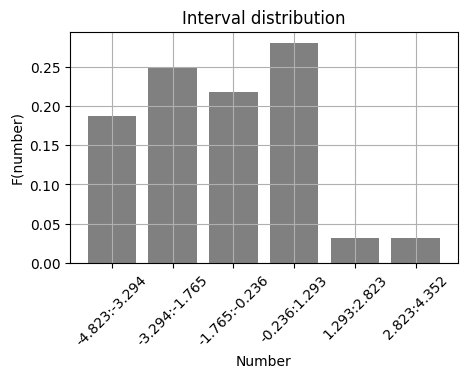

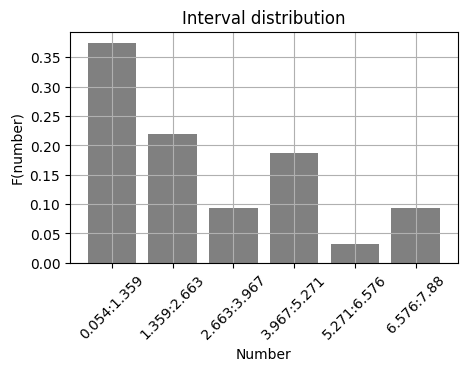

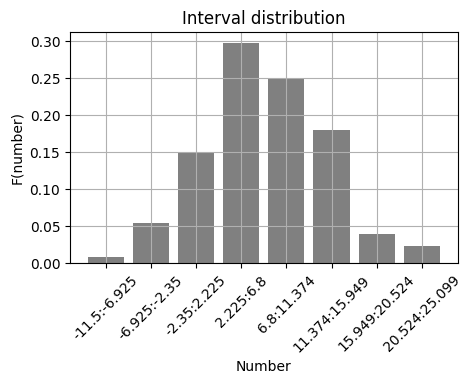

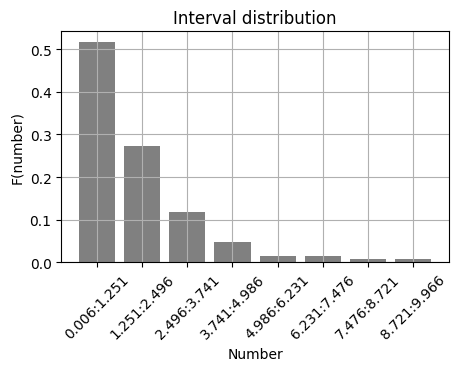

In [5]:
for i in range(len(numbers)):
    print(f'For {numbers[i]} file Pearson distribution is')
    Object = Pearson(data[i],True)
    print('\n')

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

class Anamorfoz:
    def __init__(self, data):
        self.data = data
        self.mu = np.mean(data)  # Выборочное среднее
        self.sigma = np.std(data)  # Выборочное стандартное отклонение
        self.lambda_ = 1 / self.mu  # Параметр λ для экспоненциального распределения
        self.Object = Intervals(data, False)  # Экземпляр класса Intervals для работы с интервалами
        self.frequencies = self.Object.distribution_to_intervals
        self.mid_intervals = self.Object.avg_intervals
        self.plot_distributions()

    def _log_transform(self):
        """
        Логарифмирование частот для анаморфозы.
        """
        return np.log(self.frequencies)

    def _calc_transformed_x_normal(self):
        """
        Преобразование середины интервалов по формуле анаморфозы для нормального распределения.
        """
        return ((self.mid_intervals - self.mu) ** 2) / (2 * self.sigma ** 2)

    def _calc_transformed_x_exponential(self):
        """
        Преобразование x для экспоненциального распределения: x остаётся без изменений.
        """
        return np.array(self.mid_intervals)

    def _calc_r2(self, x, y):
        """
        Расчет коэффициента детерминации (R²) по результатам линейной регрессии.
        """
        slope, intercept, r_value, _, _ = linregress(x, y)
        return r_value ** 2, slope, intercept

    def plot_distributions(self):
        log_frequencies = self._log_transform()
        transformed_x_normal = self._calc_transformed_x_normal()
        r_squared_normal, slope_normal, intercept_normal = self._calc_r2(transformed_x_normal, log_frequencies)
        transformed_x_exponential = self._calc_transformed_x_exponential()
        r_squared_exponential, slope_exponential, intercept_exponential = self._calc_r2(transformed_x_exponential, log_frequencies)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(transformed_x_normal, log_frequencies, color='blue', label='Log Frequencies')
        plt.plot(transformed_x_normal, slope_normal * transformed_x_normal + intercept_normal, color='red', label=f'Linear Fit: R²={r_squared_normal:.3f}')
        plt.xlabel('Transformed Midpoints (Normal)')
        plt.ylabel('Log(Frequency)')
        plt.title('Anamorphosis for Normal Distribution')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.scatter(transformed_x_exponential, log_frequencies, color='blue', label='Log Frequencies')
        plt.plot(transformed_x_exponential, slope_exponential * transformed_x_exponential + intercept_exponential, color='red', label=f'Linear Fit: R²={r_squared_exponential:.3f}')
        plt.xlabel('Midpoints (Exponential)')
        plt.ylabel('Log(Frequency)')
        plt.title('Anamorphosis for Exponential Distribution')
        plt.legend()
        plt.tight_layout()
        plt.show()


For 1 file Anamorfozes are
Minimum is -4.8228406132122 Maximim is 3.751617905229039


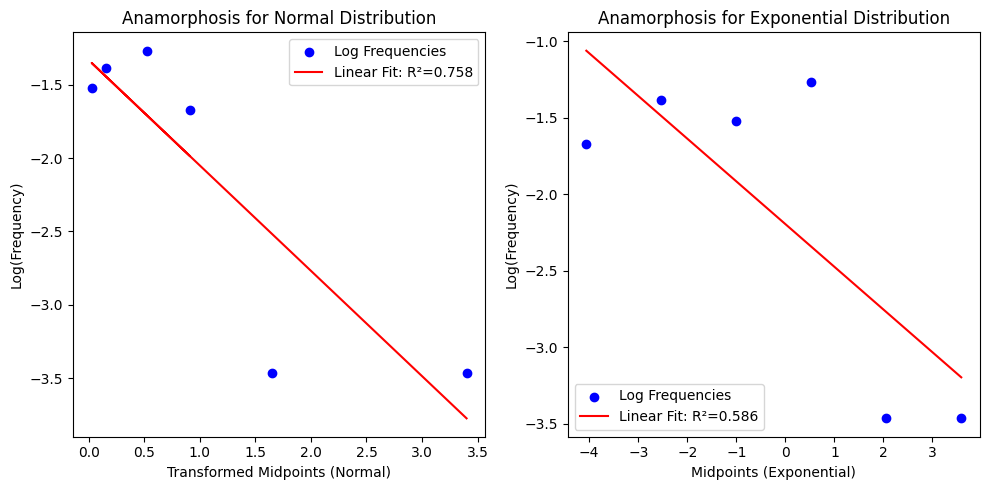



For 3 file Anamorfozes are
Minimum is 0.0542258800554018 Maximim is 7.28000799289532


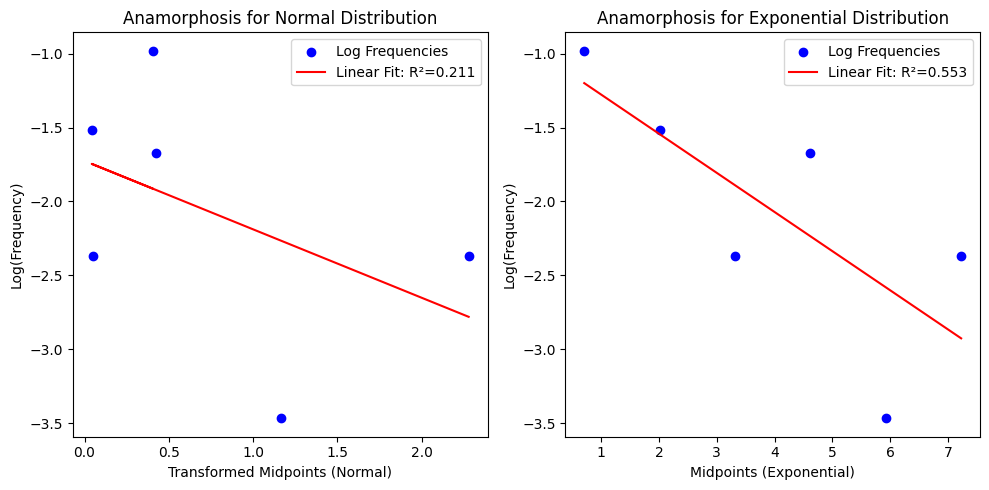



For 4 file Anamorfozes are
Minimum is -11.49995010766072 Maximim is 24.29896573481903


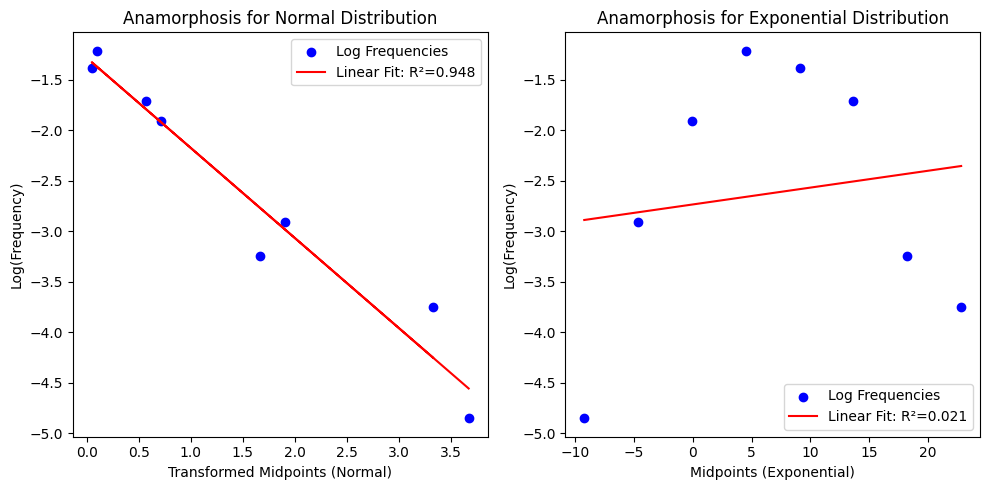



For 6 file Anamorfozes are
Minimum is 0.00589085508453523 Maximim is 9.1663041638388


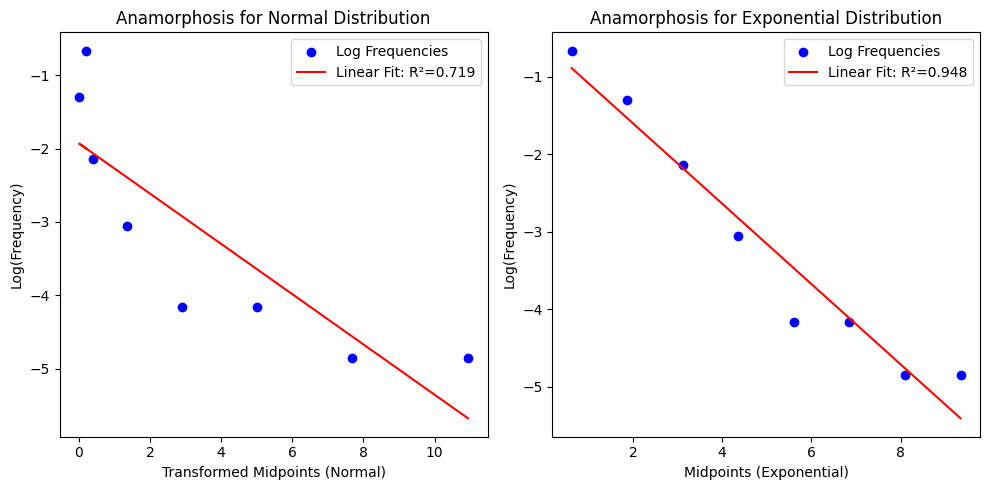

In [63]:
for i in range(len(numbers)):
    print(f'For {numbers[i]} file Anamorfozes are')
    Object = Anamorfoz(data[i])
    print('\n')